ATTEMPTS AND EXERCISES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

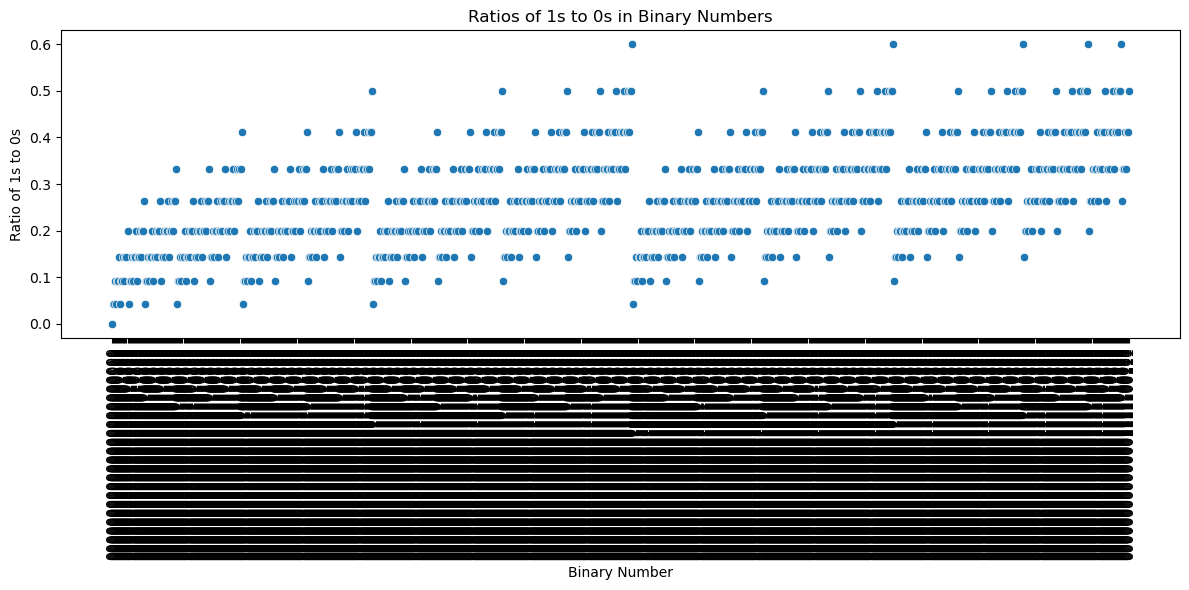

In [4]:
# FOR APPLYING LOGARITHMIC REGRESSION:

# Take a sample of the first 1000 numbers
sample_nums = []

with open("numbers.txt", "r") as file:
    for f in file:
        sample_nums.append(f.strip())
        if len(sample_nums) >= 1000:
            break
    
# Create a table of ratios of 1s and 0s in each text number
df = pd.DataFrame(sample_nums)
    
# Calculate the ratio of 1s to 0s in each number
ones_count = df[0].str.count('1')
zeros_count = df[0].str.count('0')
df["ratios"] = np.where(zeros_count > 0, ones_count / zeros_count, ones_count)

# Renaming for clarity
df.rename(columns={0: "binary_number"}, inplace=True)

# Plotting the ratios
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="binary_number", y="ratios")
plt.title("Ratios of 1s to 0s in Binary Numbers")
plt.xlabel("Binary Number")
plt.ylabel("Ratio of 1s to 0s")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()